In [1]:
import numpy as np 
import pandas as pd 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

        
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('tested.csv')

In [3]:
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test_df.shape)
test_df

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Cleaning

## Handling Missing Values

<AxesSubplot:>

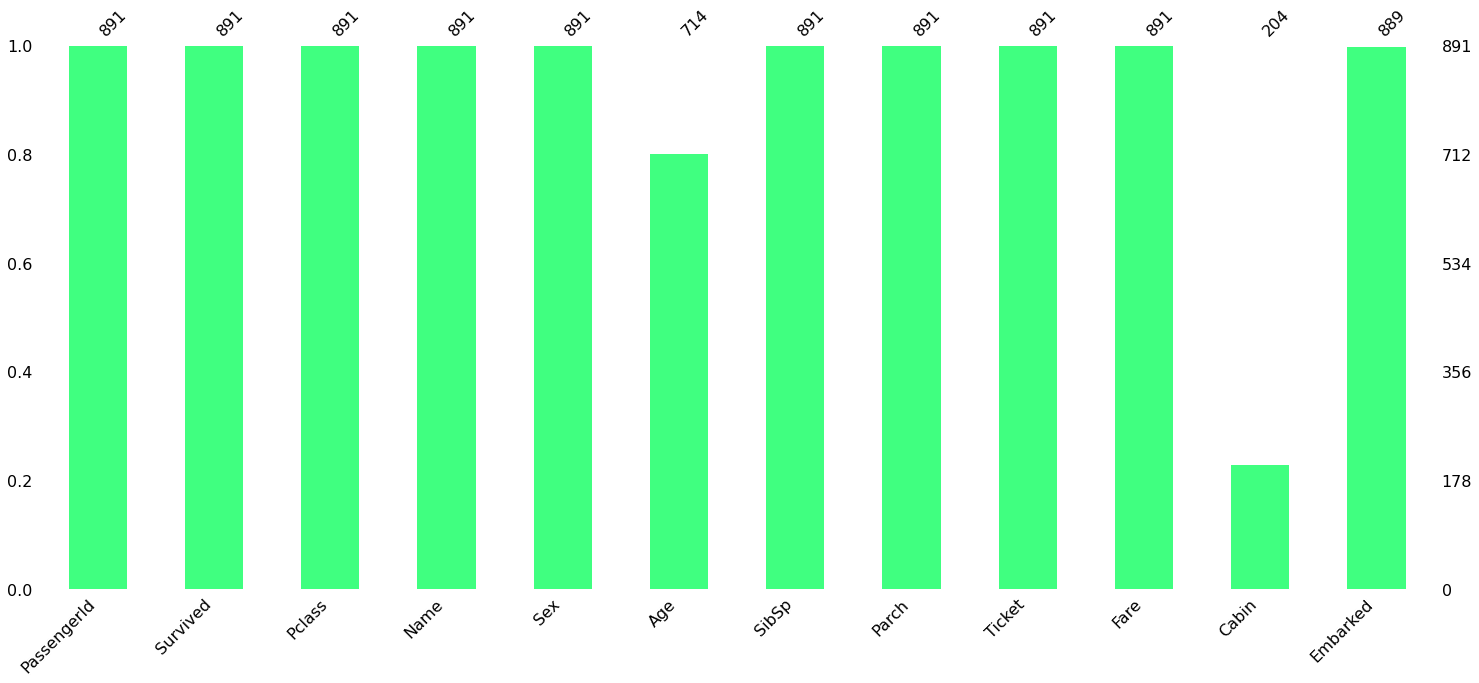

In [5]:
msn.bar(train_df, color=(0.25,1,0.5))

In [6]:
(train_df.isna().sum() / len(train_df) * 100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

<AxesSubplot:xlabel='Age'>

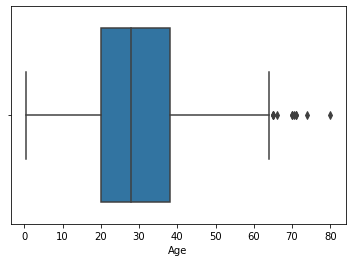

In [7]:
sns.boxplot(x = train_df['Age'])

In [8]:
# since age has outliers we will use median 
numerical_imputer = SimpleImputer(strategy= 'median')

In [9]:
train_df['Age'] = numerical_imputer.fit_transform(train_df[['Age']])
test_df['Age'] = numerical_imputer.fit_transform(test_df[['Age']])

In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [11]:
train_df['Embarked'] = categorical_imputer.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = categorical_imputer.fit_transform(test_df[['Embarked']])

In [12]:
# We droped 'Cabin' column because it has more than 50% null values
# and 'PassengerId' column because it's not important
train_df.drop(['Cabin'], axis = 1, inplace = True)
test_df.drop(['Cabin'], axis = 1, inplace = True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
train_df['Age'] = train_df['Age'].astype('int')
test_df['Age'] = test_df['Age'].astype('int')

In [15]:
test_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
test_df.dropna(inplace=True)

# Cardinality

In [17]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [18]:
train_df.select_dtypes(include = 'object').nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [19]:
train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In the above cells we droped Name and Ticket columns because they have very High Cardinality that will cause noise to our ML model


# Feature Engineering

In [20]:
train_df['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [21]:
def age_groups(age):
    if age in range(1,13):
        return 'Children'
    elif age in range(13,18):
        return 'Teens'
    elif age in range(18,66):
        return 'Adults'
    else:
        return 'Elders'

In [22]:
train_df['Age Group'] = train_df['Age'].apply(age_groups)
test_df['Age Group'] = test_df['Age'].apply(age_groups)

In [23]:
train_df['Age Group'].value_counts()

Adults      770
Children     62
Teens        44
Elders       15
Name: Age Group, dtype: int64

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Age Group    891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


# Exploratory Data Analysis

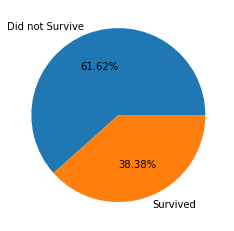

In [25]:
plt.pie(x = train_df['Survived'].value_counts(), labels = ['Did not Survive', 'Survived'], autopct='%.2f%%');

# Univariate Analysis

In [26]:

survived_df = train_df[train_df['Survived'] == 1]
not_survived_df = train_df[train_df['Survived'] == 0]
print(survived_df.shape,'\n', not_survived_df.shape)

(342, 10) 
 (549, 10)


In [27]:
def uni_categorical(col):
    plt.subplot(1,2,1)
    
    plt.title(f'{col}')
    sns.countplot(data = train_df,
                  x = col,
                  hue = 'Survived',
                  order=sorted(train_df[col].unique()),
                  
                 )
    print(f"Survived Percentage for each class in {col}: \n")
    
    print(round((survived_df[col].value_counts()/len(survived_df))*100,1),'\n')
    print("*"*25)
    
    print(f"Didn't Survive Percentage for each class in {col}: \n")
    
    print(round((not_survived_df[col].value_counts()/len(not_survived_df))*100,1),'\n')
    print("*"*25)
    
    
    plt.subplot(1,2,2)
    
    plt.title(f'{col} of who did not survive')
    sns.countplot(
        data = not_survived_df,
        x = col,
        order=sorted(train_df[col].unique())
    )
    
    
    plt.tight_layout()
    plt.show()

Survived Percentage for each class in Sex: 

female    68.1
male      31.9
Name: Sex, dtype: float64 

*************************
Didn't Survive Percentage for each class in Sex: 

male      85.2
female    14.8
Name: Sex, dtype: float64 

*************************


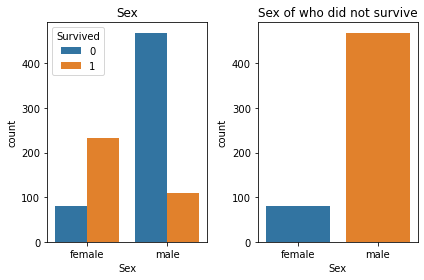

Survived Percentage for each class in Embarked: 

S    64.0
C    27.2
Q     8.8
Name: Embarked, dtype: float64 

*************************
Didn't Survive Percentage for each class in Embarked: 

S    77.8
C    13.7
Q     8.6
Name: Embarked, dtype: float64 

*************************


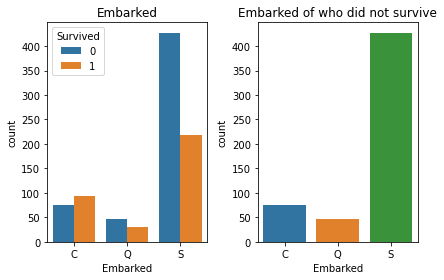

Survived Percentage for each class in Age Group: 

Adults      81.9
Children     9.6
Teens        6.1
Elders       2.3
Name: Age Group, dtype: float64 

*************************
Didn't Survive Percentage for each class in Age Group: 

Adults      89.3
Children     5.3
Teens        4.2
Elders       1.3
Name: Age Group, dtype: float64 

*************************


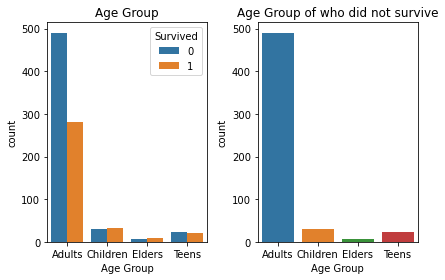

In [28]:

for col in train_df.select_dtypes(include = 'object').columns.to_list():
    uni_categorical(col)

* In `Sex` coloumn:
    * Most Survivors were Females
* In `Embarked` column:
    * Most Survivors were Embarked in Southampton
* In `Age` Group column:
    * Most passengers were Adults
    * Most Survivors Were Adults
    * Most of those who Didn't Survive were Elders

In [29]:
train_df.select_dtypes(include='number').drop('Survived',axis = 1).columns.to_list()

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

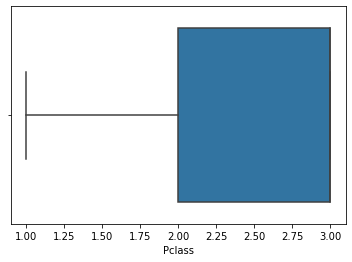

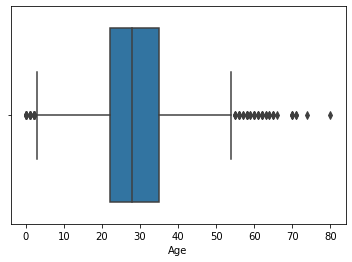

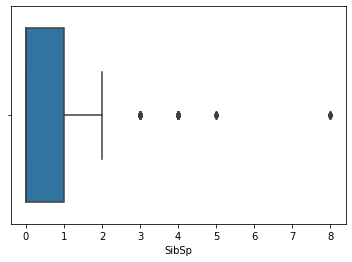

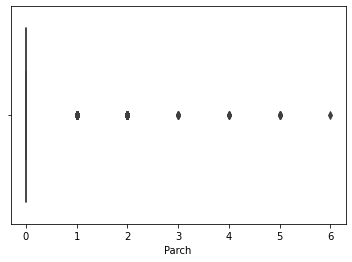

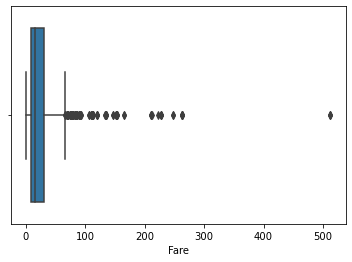

In [30]:
for col in train_df.select_dtypes(include='number').drop(['Survived','PassengerId'],axis = 1).columns.to_list():
    sns.boxplot(x = train_df[col])
    plt.show();

# Multivariate Analysis

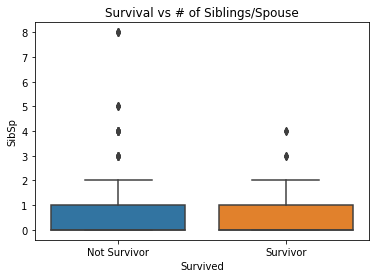

In [31]:
ax = sns.boxplot(x= train_df['Survived'], y = train_df['SibSp'])
plt.title('Survival vs # of Siblings/Spouse')
ax.set_xticklabels(['Not Survivor', 'Survivor']);

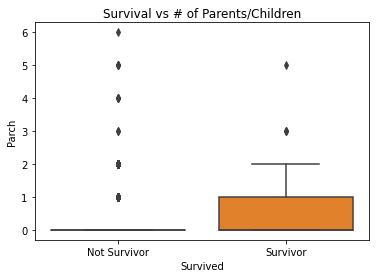

In [32]:
ax = sns.boxplot(x= train_df['Survived'], y = train_df['Parch'])
plt.title('Survival vs # of Parents/Children')
ax.set_xticklabels(['Not Survivor', 'Survivor']);

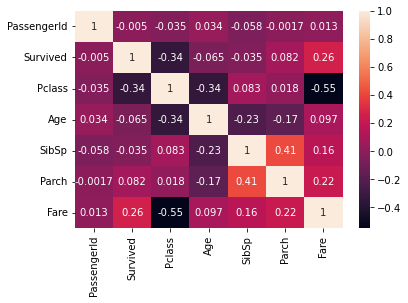

In [33]:
sns.heatmap(train_df.corr(), annot=True);

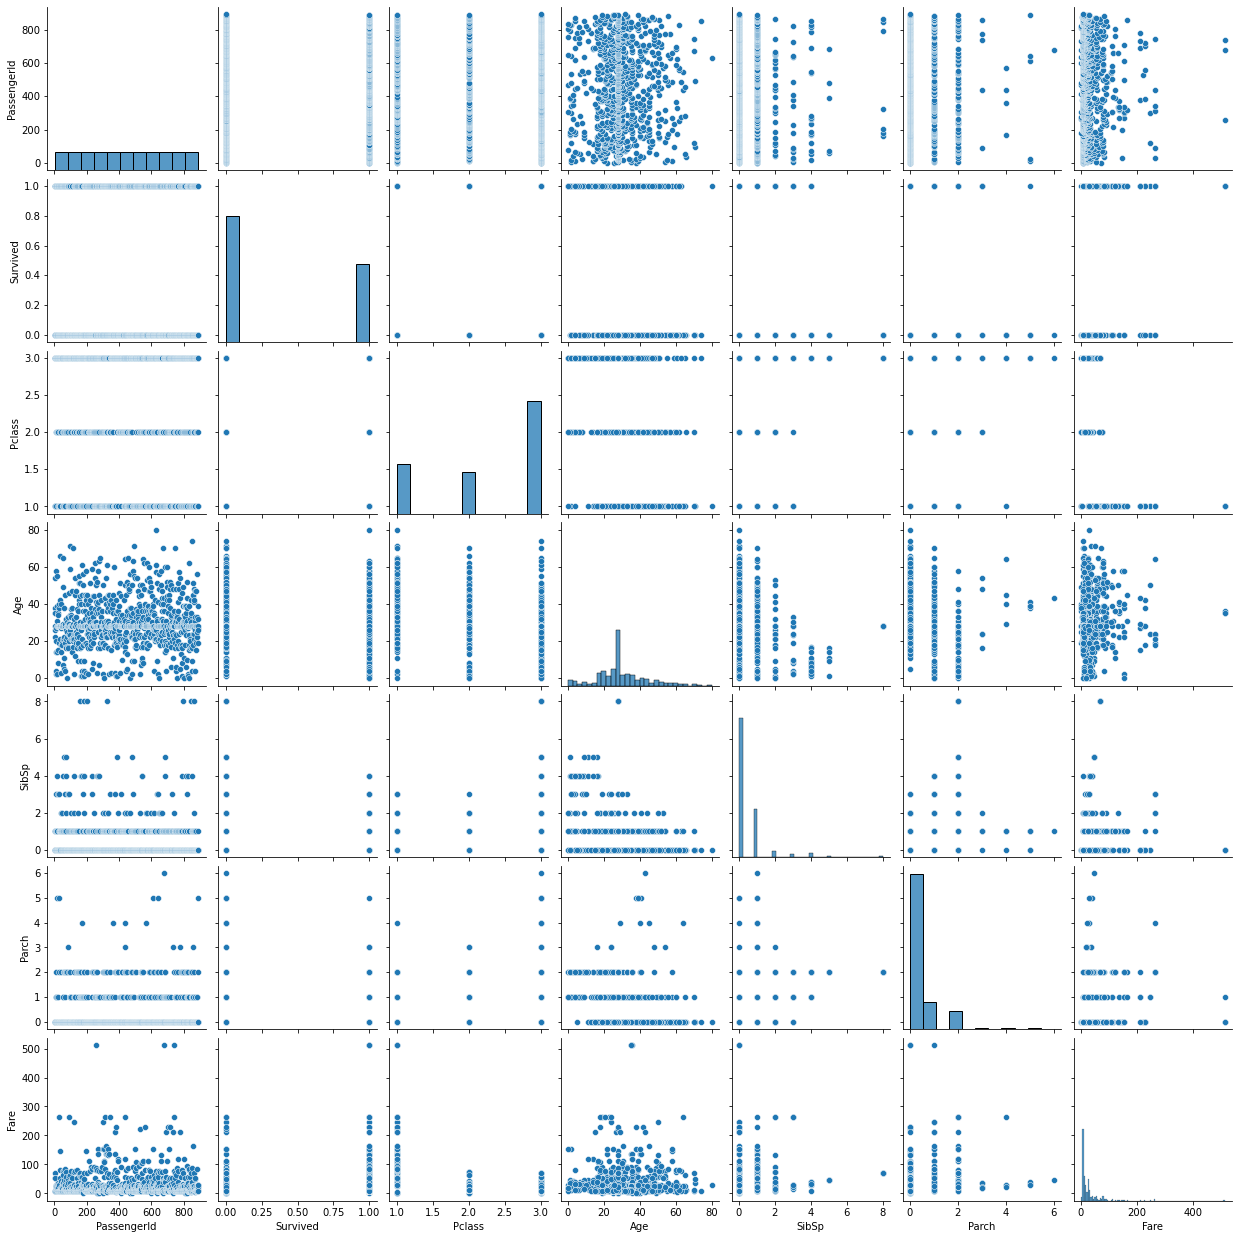

In [35]:
sns.pairplot(train_df);

# Train-Test Split

In [36]:
X_train = train_df.drop(['Survived','PassengerId'], axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop(['Survived','PassengerId'], axis = 1)
y_test = test_df['Survived']


In [37]:
std = StandardScaler()

In [38]:
X_train.select_dtypes('object').columns

Index(['Sex', 'Embarked', 'Age Group'], dtype='object')

In [39]:
X_trian_encoded= pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'Age Group'])
X_trian_encoded.shape

(891, 14)

In [40]:
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Age Group'])
X_test_encoded.shape

(417, 14)

# Feature Selection 

In [41]:
def pearson_corr(dataset, threshold):
    
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]):
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [42]:
correlated_features = pearson_corr(X_trian_encoded,0.95)
print(len(correlated_features))
correlated_features

13


{'Age',
 'Age Group_Adults',
 'Age Group_Children',
 'Age Group_Elders',
 'Age Group_Teens',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Fare',
 'Parch',
 'Sex_female',
 'Sex_male',
 'SibSp'}

In [43]:
mutual_info = mutual_info_classif(X_trian_encoded,y_train)
mutual_info

array([0.07436916, 0.00884512, 0.02142197, 0.02148225, 0.14939958,
       0.15724731, 0.13137936, 0.        , 0.00180271, 0.        ,
       0.01412058, 0.01229065, 0.03782317, 0.        ])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_trian_encoded.columns
print(len(mutual_info))
mutual_info.sort_values(ascending=False)

14


Sex_female            0.157247
Fare                  0.149400
Sex_male              0.131379
Pclass                0.074369
Age Group_Elders      0.037823
Parch                 0.021482
SibSp                 0.021422
Age Group_Adults      0.014121
Age Group_Children    0.012291
Age                   0.008845
Embarked_Q            0.001803
Embarked_C            0.000000
Embarked_S            0.000000
Age Group_Teens       0.000000
dtype: float64

We will Select the top 10 features that has the highest IG 

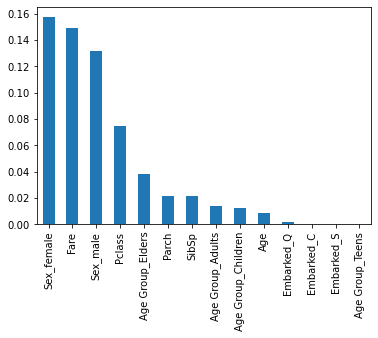

In [46]:
mutual_info.sort_values(ascending=False).plot.bar();

In [47]:
mutual_info.sort_values(ascending=False)

Sex_female            0.157247
Fare                  0.149400
Sex_male              0.131379
Pclass                0.074369
Age Group_Elders      0.037823
Parch                 0.021482
SibSp                 0.021422
Age Group_Adults      0.014121
Age Group_Children    0.012291
Age                   0.008845
Embarked_Q            0.001803
Embarked_C            0.000000
Embarked_S            0.000000
Age Group_Teens       0.000000
dtype: float64

In [48]:
X_train = X_trian_encoded.drop(['Embarked_Q','Embarked_C', 'Embarked_S', 'Age Group_Teens', 'Age'], axis = 1)

In [49]:
X_test = X_test_encoded.drop(['Embarked_Q','Embarked_C', 'Embarked_S', 'Age Group_Teens', 'Age'], axis = 1)

In [50]:
X_test

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age Group_Adults,Age Group_Children,Age Group_Elders
0,3,0,0,7.8292,0,1,1,0,0
1,3,1,0,7.0000,1,0,1,0,0
2,2,0,0,9.6875,0,1,1,0,0
3,3,0,0,8.6625,0,1,1,0,0
4,3,1,1,12.2875,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,1,0,0
414,1,0,0,108.9000,1,0,1,0,0
415,3,0,0,7.2500,0,1,1,0,0
416,3,0,0,8.0500,0,1,1,0,0


In [51]:
print(X_train.shape)
print(X_test.shape)


(891, 9)
(417, 9)


In [52]:
std = StandardScaler()

In [53]:
X_train = std.fit_transform(X_train)

In [54]:
X_test = std.fit_transform(X_test)

# Model Selection

In [55]:
classifiers = [

    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    {'name': 'Random Forest', 'classifier': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}},
    {'name': 'Support Vector Machines', 'classifier': SVC(), 'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}},
    
]


In [56]:
for clf in classifiers:
    print(f"\t\tPerforming grid search for {clf['name']}: \n\n")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {(grid_search.best_score_)*100}")
    print(f"Test accuracy: {(grid_search.score(X_test, y_test))*100}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted 1:', counts[1])
    print('Count of Predicted 0:', counts[0])
    print('-' *60)

		Performing grid search for Decision Tree: 


Best parameters: {'max_depth': 7}
Training accuracy: 81.59688657334756
Test accuracy: 89.92805755395683

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       265
           1       0.92      0.80      0.85       152

    accuracy                           0.90       417
   macro avg       0.90      0.88      0.89       417
weighted avg       0.90      0.90      0.90       417

Count of Predicted 1: 132
Count of Predicted 0: 285
------------------------------------------------------------
		Performing grid search for Random Forest: 


Best parameters: {'max_depth': 7, 'n_estimators': 10}
Training accuracy: 82.15366267026552
Test accuracy: 92.08633093525181

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       265
           1       0.89      0.89      0.89       152

    accuracy              

In [60]:
svm = SVC(C = 10, kernel='rbf')
svm.fit(X_train, y_train)
y_predict_dt = svm.predict(X_test)
print(svm.score(X_test,y_test) * 100)

94.7242206235012


In [61]:
y_predict_dt

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [62]:
submissions = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived' : y_predict_dt
}
)

In [63]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [64]:
submissions.to_csv('My Titanic Predictions.csv', index=False)